# Predictions

For calculating the predictions regarding the i) number of infections, ii) number of hospitalisations, iii) number of Intensive Care Units and iv) number of deaths, we'll use ARMA - Autoregressive Moving Average 

In [1]:
from imports_functions import *
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
db1 = pd.read_csv('covid-19-sample.csv')

In [3]:
db1 =clean_data(db1)

We'll treat the data as a time series. For that, we shall aplply evolution function and set the date as index:

In [4]:
bydate=evolution(db1).set_index('date')

## Infections

We should train an ARMA model for a given p and q, for a given set of days. After several experiments and simulations, one found that we minimise the root square mean error if we train the model with the whole dataset, and predict on forward:

In [5]:
def add_days(dataframe):
    
    dataframe = dataframe.append(pd.Series(name='2021-06-11 00:00:00'))
    dataframe = dataframe.append(pd.Series(name='2021-06-12 00:00:00'))
    dataframe = dataframe.append(pd.Series(name='2021-06-13 00:00:00'))
    dataframe = dataframe.append(pd.Series(name='2021-06-14 00:00:00'))
    dataframe = dataframe.append(pd.Series(name='2021-06-15 00:00:00'))
    dataframe = dataframe.append(pd.Series(name='2021-06-16 00:00:00'))
    dataframe = dataframe.append(pd.Series(name='2021-06-17 00:00:00'))
    
    return dataframe

In [6]:
infections = training_models(bydate, 'infections')

In [7]:
def pred_infections(dataframe):

        model = ARMA(dataframe, order = (4, 2)).fit(disp=False)
        aux = add_days(dataframe)
        train = aux[:-7]
        return pd.DataFrame(model.predict(len(train), len(aux)-1), columns=['pred_infections'])

In [8]:
pred_infections = pred_infections(infections)

/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [9]:
pred_infections

,pred_infections
2021-06-11,3436.980030
2021-06-12,3383.025769
2021-06-13,3347.409818
2021-06-14,3330.748341
2021-06-15,3328.881073
2021-06-16,3341.760262
2021-06-17,3369.143182


## Hospitalisations

In [10]:
hosp = training_models(bydate, 'hospitalisations')

In [11]:
def pred_hosp(dataframe):

        model = ARMA(dataframe, order = (19, 11)).fit(disp=False)
        aux = add_days(dataframe)
        train = aux[:-7]
        return pd.DataFrame(model.predict(len(train), len(aux)-1), columns=['pred_hosp'])

In [12]:
pred_hosp = pred_hosp(hosp)

/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
pred_hosp

,pred_hosp
2021-06-11,159.873646
2021-06-12,157.179157
2021-06-13,158.815545
2021-06-14,162.838239
2021-06-15,167.128339
2021-06-16,179.841826
2021-06-17,190.712059


## Intensive Care Units

In [14]:
uci = training_models(bydate, 'icu')

In [15]:
def pred_uci(dataframe):

        model = ARMA(dataframe, order = (2, 6)).fit(disp=False)
        aux = add_days(dataframe)
        train = aux[:-7]
        return pd.DataFrame(model.predict(len(train), len(aux)-1), columns=['pred_uci'])

In [16]:
pred_uci = pred_uci(uci)

/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


## Deaths

In [17]:
deaths = training_models(bydate, 'deaths')

In [18]:
deaths

,ave_7_num_dead
date,
2020-02-23,0.000000
2020-02-24,0.000000
2020-02-25,0.000000
2020-02-26,0.000000
2020-02-27,0.000000
...,...
2021-06-06,17.428571
2021-06-07,16.000000
2021-06-08,16.571429


In [55]:
def pred_deaths(dataframe):

        model = ARMA(dataframe, order = (2, 6)).fit(disp=False)
        aux = add_days(dataframe)
        train = aux[:-7]
        return pd.DataFrame(model.predict(len(train), len(aux)-1), columns=['pred_deaths'])

In [56]:
pred_deaths = pred_deaths(deaths)

/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [57]:
pred_deaths

,pred_deaths
2021-06-11,13.016844
2021-06-12,12.667172
2021-06-13,13.765634
2021-06-14,14.791417
2021-06-15,16.457542
2021-06-16,18.820792
2021-06-17,21.751402


In [58]:
predictions_f = pd.concat([pred_infections, pred_hosp, pred_uci, pred_deaths], axis = 1)

In [59]:
predictions_f

,pred_infections,pred_hosp,pred_uci,pred_deaths
2021-06-11,3436.980030,159.873646,11.825539,13.016844
2021-06-12,3383.025769,157.179157,9.694381,12.667172
2021-06-13,3347.409818,158.815545,8.542284,13.765634
2021-06-14,3330.748341,162.838239,8.306022,14.791417
2021-06-15,3328.881073,167.128339,8.000496,16.457542
2021-06-16,3341.760262,179.841826,8.353581,18.820792
2021-06-17,3369.143182,190.712059,9.258439,21.751402


In [60]:
predictions = pd.read_csv('predictions.csv')

In [61]:
predictions = predictions.rename(columns={'Unnamed: 0': 'date'})

In [62]:
predictions

,date,pred_num_infections,pred_num_hosp,pred_num_uci,pred_num_dead
0,2021-06-11,3430.818823,159.873646,11.825539,13.016844
1,2021-06-12,3353.771666,157.179157,9.694381,12.667172
2,2021-06-13,3191.312601,158.815545,8.542284,13.765634
3,2021-06-14,3046.618273,162.838239,8.306022,14.791417
4,2021-06-15,2952.195890,167.128339,8.000496,16.457542
5,2021-06-16,2946.160710,179.841826,8.353581,18.820792
6,2021-06-17,3008.848439,190.712059,9.258439,21.751402


In [63]:
pred_2 = predictions[['date', 'pred_num_dead']]

In [64]:
pred_2 = pred_2.set_index('date')

In [65]:
db3 = pd.read_csv('covid-19-sample_val.csv')
db3 = clean_data(db3)
bydate3 = evolution(db3).set_index('date')

In [66]:
val = bydate3.tail(7)

In [67]:
val = pd.DataFrame(val.ave_7_num_dead, columns = ['ave_7_num_dead'])

In [68]:
val = pd.concat([val, pred_deaths], axis=1)

In [69]:
val = pd.concat([val, pred_2], axis=1)

In [70]:
val

,ave_7_num_dead,pred_deaths,pred_num_dead
2021-06-11,13.000000,13.016844,13.016844
2021-06-12,11.571429,12.667172,12.667172
2021-06-13,10.714286,13.765634,13.765634
2021-06-14,9.857143,14.791417,14.791417
2021-06-15,9.428571,16.457542,16.457542
2021-06-16,9.428571,18.820792,18.820792
2021-06-17,7.714286,21.751402,21.751402


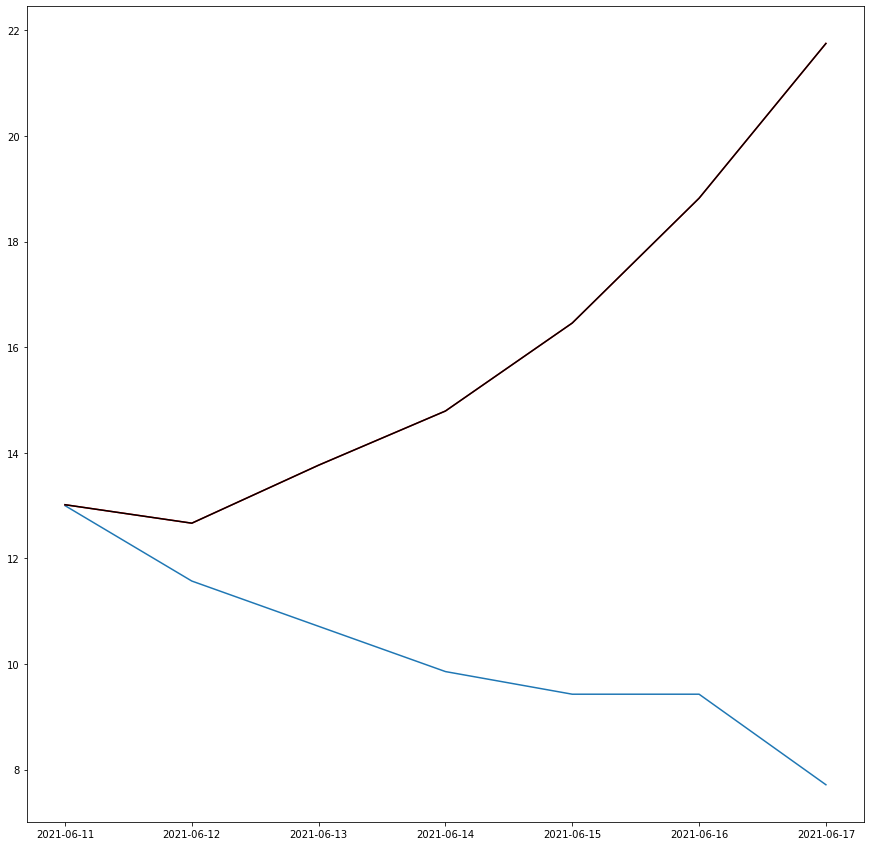

In [71]:
plt.rcParams['figure.figsize']=(15, 15)
plt.plot(val.ave_7_num_dead);
plt.plot(val.pred_deaths, 'r')
plt.plot(val.pred_num_dead, 'black')

In [36]:
val = bydate3.tail(7)

In [37]:
val = pd.DataFrame(val.ave_7_num_infections, columns = ['ave_7_num_infections'])
val = pd.concat([val, pred_1], axis = 1)
val = pd.concat([val, pred_2], axis = 1)

NameError: name 'pred_1' is not defined

In [ ]:
plt.rcParams['figure.figsize']=(15, 15)
plt.plot(val.ave_7_num_infections);
plt.plot(val.pred_1, 'r')
plt.plot(val.pred_num_infections, 'black')